# Exploratory Data Analysis on the House Price Prediction

Author: Ade Kukuh Setiawan

Description:

This notebook provides a preliminary step before applying machine learning algorithm for house price prediction. Data source: https://www.kaggle.com/shree1992/housedata

Outline:
1. Data Extraction
2. Data Exploration
3. Data Preprocessing

### Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

## 1. Data Extraction

In [2]:
data = pd.read_csv("../data/data1.csv")

In [3]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [5]:
data.shape

(4600, 18)

In [6]:
m = data.shape[0]
n = data.shape[1]

print("Number of rows: " + str(m))
print("Number of columns: " + str(n))

Number of rows: 4600
Number of columns: 18


## 2. Data Exploration

### Univariate Analysis

In [7]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


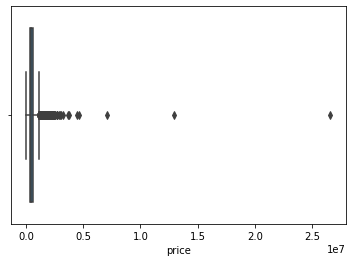

In [8]:
ax = sns.boxplot(x = data["price"])

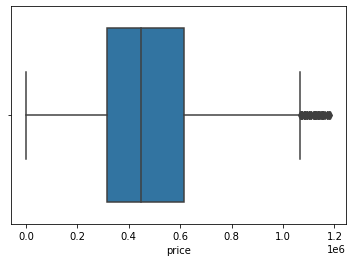

In [9]:
q = data["price"].quantile(0.95)
data_filtered = data[ data["price"] < q ]
ax = sns.boxplot(x = data_filtered["price"])

### Bivariate Analysis

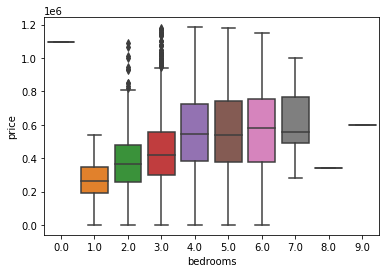

In [10]:
ax = sns.boxplot(x = "bedrooms", y = "price", data = data_filtered)

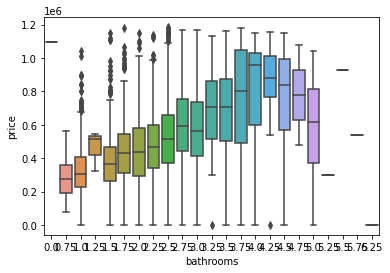

In [11]:
ax = sns.boxplot(x = "bathrooms", y = "price", data = data_filtered)

### Correlation

In [12]:
data.corr(method = "pearson")

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
price,1.000000,0.200336,0.327110,0.430410,0.050451,0.151461,0.135648,0.228504,0.034915,0.367570,0.210427,0.021857,-0.028774
bedrooms,0.200336,1.000000,0.545920,0.594884,0.068819,0.177895,-0.003483,0.111028,0.025080,0.484705,0.334165,0.142461,-0.061082
bathrooms,0.327110,0.545920,1.000000,0.761154,0.107837,0.486428,0.076232,0.211960,-0.119994,0.689918,0.298020,0.463498,-0.215886
sqft_living,0.430410,0.594884,0.761154,1.000000,0.210538,0.344850,0.117616,0.311009,-0.062826,0.876443,0.447206,0.287775,-0.122817
sqft_lot,0.050451,0.068819,0.107837,0.210538,1.000000,0.003750,0.017241,0.073907,0.000558,0.216455,0.034842,0.050706,-0.022730
floors,0.151461,0.177895,0.486428,0.344850,0.003750,1.000000,0.022024,0.031211,-0.275013,0.522814,-0.255510,0.467481,-0.233996
waterfront,0.135648,-0.003483,0.076232,0.117616,0.017241,0.022024,1.000000,0.360935,0.000352,0.078911,0.097501,-0.023563,0.008625
view,0.228504,0.111028,0.211960,0.311009,0.073907,0.031211,0.360935,1.000000,0.063077,0.174327,0.321602,-0.064465,0.022967
condition,0.034915,0.025080,-0.119994,-0.062826,0.000558,-0.275013,0.000352,0.063077,1.000000,-0.178196,0.200632,-0.399698,-0.186818
sqft_above,0.367570,0.484705,0.689918,0.876443,0.216455,0.522814,0.078911,0.174327,-0.178196,1.000000,-0.038723,0.408535,-0.160426


In [13]:
c = data.corr(method = "pearson")
c_sorted = c.sort_values( by=['price'], ascending = False )
c_sorted["price"]

price            1.000000
sqft_living      0.430410
sqft_above       0.367570
bathrooms        0.327110
view             0.228504
sqft_basement    0.210427
bedrooms         0.200336
floors           0.151461
waterfront       0.135648
sqft_lot         0.050451
condition        0.034915
yr_built         0.021857
yr_renovated    -0.028774
Name: price, dtype: float64

Text(0, 0.5, 'Pearson Correlation Coefficient (R)')

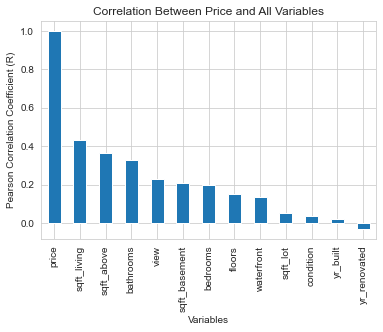

In [14]:
sns.set_style("whitegrid")

c_sorted["price"].plot( kind="bar" )
plt.title("Correlation Between Price and All Variables")
plt.xlabel("Variables")
plt.ylabel("Pearson Correlation Coefficient (R)")

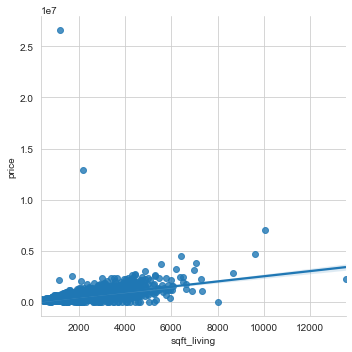

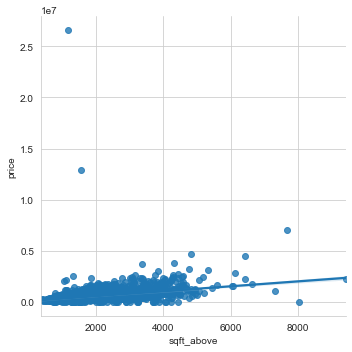

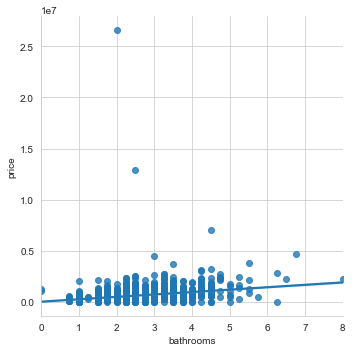

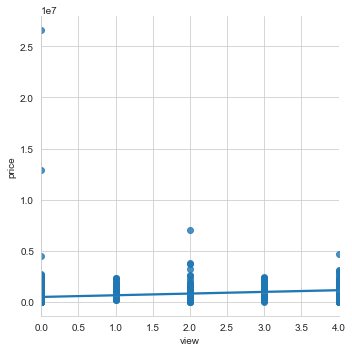

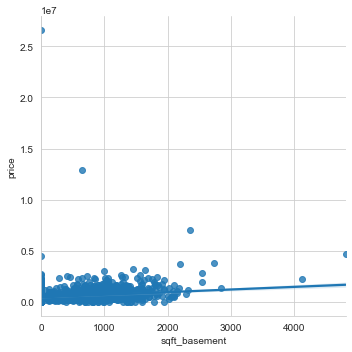

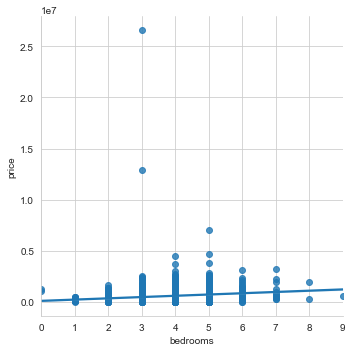

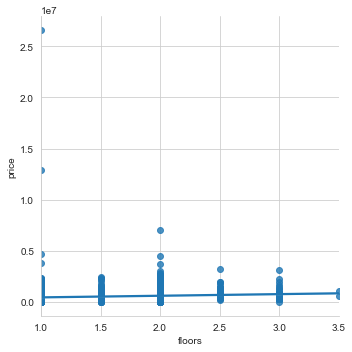

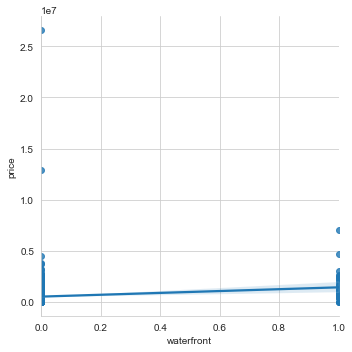

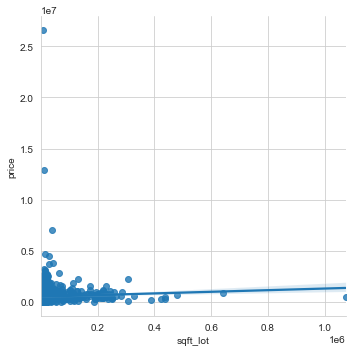

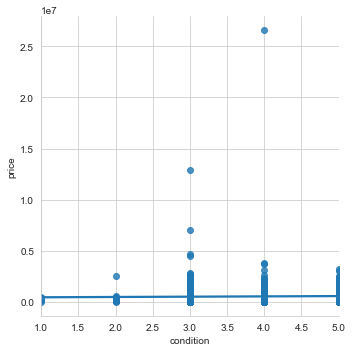

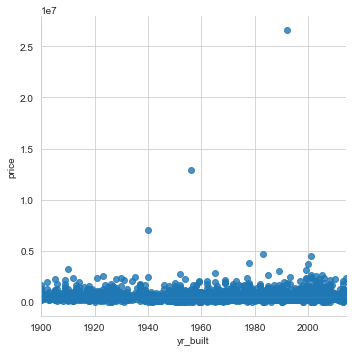

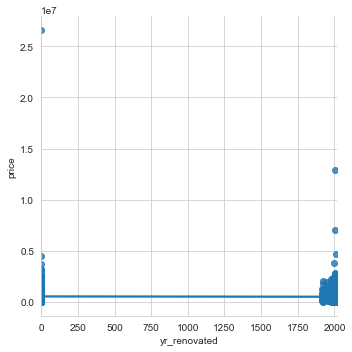

In [15]:
features = ["sqft_living", "sqft_above", "bathrooms", "view", \
           "sqft_basement", "bedrooms", "floors", "waterfront", \
           "sqft_lot", "condition", "yr_built", "yr_renovated"]

for i in features:
    sns.lmplot(x = i, y = "price", data = data)

## 3. Data Preprocessing

### Feature Selection 

In [16]:
selected_features = ["sqft_living", "sqft_above", "bathrooms", "view", \
                     "sqft_basement", "bedrooms", "floors", "waterfront", "statezip"]

In [17]:
selected_data = data[selected_features]
selected_data.head()

,sqft_living,sqft_above,bathrooms,view,sqft_basement,bedrooms,floors,waterfront,statezip
0,1340,1340,1.50,0,0,3.0,1.5,0,WA 98133
1,3650,3370,2.50,4,280,5.0,2.0,0,WA 98119
2,1930,1930,2.00,0,0,3.0,1.0,0,WA 98042
3,2000,1000,2.25,0,1000,3.0,1.0,0,WA 98008
4,1940,1140,2.50,0,800,4.0,1.0,0,WA 98052


In [18]:
selected_data["price"] = data["price"]
selected_data.head()

<ipython-input-18-79e410621dfe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data["price"] = data["price"]


,sqft_living,sqft_above,bathrooms,view,sqft_basement,bedrooms,floors,waterfront,statezip,price
0,1340,1340,1.50,0,0,3.0,1.5,0,WA 98133,313000.0
1,3650,3370,2.50,4,280,5.0,2.0,0,WA 98119,2384000.0
2,1930,1930,2.00,0,0,3.0,1.0,0,WA 98042,342000.0
3,2000,1000,2.25,0,1000,3.0,1.0,0,WA 98008,420000.0
4,1940,1140,2.50,0,800,4.0,1.0,0,WA 98052,550000.0


In [19]:
selected_data.shape

(4600, 10)

### Remove Outliers

In [20]:
q = selected_data["price"].quantile(0.75)
filtered_data = selected_data[ (selected_data["price"] < q )
                             & (selected_data["price"] > 0)].copy()
filtered_data.head()

,sqft_living,sqft_above,bathrooms,view,sqft_basement,bedrooms,floors,waterfront,statezip,price
0,1340,1340,1.50,0,0,3.0,1.5,0,WA 98133,313000.0
2,1930,1930,2.00,0,0,3.0,1.0,0,WA 98042,342000.0
3,2000,1000,2.25,0,1000,3.0,1.0,0,WA 98008,420000.0
4,1940,1140,2.50,0,800,4.0,1.0,0,WA 98052,550000.0
5,880,880,1.00,0,0,2.0,1.0,0,WA 98115,490000.0


In [21]:
filtered_data.shape

(3401, 10)

### Feature Scaling (Normalization)

In [22]:
X = filtered_data[selected_features]
y = filtered_data["price"]
X.head()

,sqft_living,sqft_above,bathrooms,view,sqft_basement,bedrooms,floors,waterfront,statezip
0,1340,1340,1.50,0,0,3.0,1.5,0,WA 98133
2,1930,1930,2.00,0,0,3.0,1.0,0,WA 98042
3,2000,1000,2.25,0,1000,3.0,1.0,0,WA 98008
4,1940,1140,2.50,0,800,4.0,1.0,0,WA 98052
5,880,880,1.00,0,0,2.0,1.0,0,WA 98115


In [23]:
X = filtered_data[selected_features].values # returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X)

ValueError: could not convert string to float: 'WA 98133'

In [ ]:
normalized_data = pd.DataFrame(X_scaled, columns = selected_features) # return a data frame
normalized_data.head()

In [ ]:
filtered_data["bathrooms"].plot.hist()

In [ ]:
normalized_data["bathrooms"].plot.hist()

In [ ]:
# features X
X = normalized_data.values

# label y
y = filtered_data["price"].values

In [ ]:
X

In [ ]:
y

### Add Location

In [24]:
filtered_data.head()

,sqft_living,sqft_above,bathrooms,view,sqft_basement,bedrooms,floors,waterfront,statezip,price
0,1340,1340,1.50,0,0,3.0,1.5,0,WA 98133,313000.0
2,1930,1930,2.00,0,0,3.0,1.0,0,WA 98042,342000.0
3,2000,1000,2.25,0,1000,3.0,1.0,0,WA 98008,420000.0
4,1940,1140,2.50,0,800,4.0,1.0,0,WA 98052,550000.0
5,880,880,1.00,0,0,2.0,1.0,0,WA 98115,490000.0


In [25]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [26]:
filtered_data ["statezip_encoded"] = le.fit_transform(filtered_data.statezip)
filtered_data.head()

,sqft_living,sqft_above,bathrooms,view,sqft_basement,bedrooms,floors,waterfront,statezip,price,statezip_encoded
0,1340,1340,1.50,0,0,3.0,1.5,0,WA 98133,313000.0,62
2,1930,1930,2.00,0,0,3.0,1.0,0,WA 98042,342000.0,26
3,2000,1000,2.25,0,1000,3.0,1.0,0,WA 98008,420000.0,7
4,1940,1140,2.50,0,800,4.0,1.0,0,WA 98052,550000.0,31
5,880,880,1.00,0,0,2.0,1.0,0,WA 98115,490000.0,54


In [ ]:
## one Not Encoding



In [ ]:
filtered_data = filtered_data.join(ohc_df)
filtered_data.head()

In [ ]:
exp_data = filtered_data.copy()
x2 = exp_data.copy()
x2.drop[()]

## 4. Model Evaluation

### 4.1. Linear Regression

In [ ]:
#split into training and testing

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size = 0.2,
                                                   random_state = 2020)

m = len(X)
m_train = len(X_train)
m_test = len(X_test)

print("=== + ===")
print("Total data = " +str(m))
print("train data = " +str(m_train))
print("test data  = " +str(m_test))

#Model Development

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

#Model Evaluation
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr
import numpy as np

y_pred = lin_reg.predict(X_test)
mse = mean_squared_error (y_pred, y_test)
rmse = np.sqrt(mse)
r, _ = pearsonr (y_pred , y_test)

print("=== * ===")
print("Root mean Squared Error (RMSE) = " +str(rmse))
print("Pearson's Correlation Coefficient = " +str(r))

# plot actual price vs. predicted price
from matplotlib import pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.axis([0, 700000, 0, 700000])
plt.show()


In [ ]:
#split into training and testing

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X2, y2,
                                                   test_size = 0.2,
                                                   random_state = 2020)

m = len(X2)
m_train = len(X_train)
m_test = len(X_test)

print("=== + ===")
print("Total data = " +str(m))
print("train data = " +str(m_train))
print("test data  = " +str(m_test))

#Model Development

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

#Model Evaluation
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr
import numpy as np

y_pred = lin_reg.predict(X_test)
mse = mean_squared_error (y_pred, y_test)
rmse = np.sqrt(mse)
r, _ = pearsonr (y_pred , y_test)

print("=== * ===")
print("Root mean Squared Error (RMSE) = " +str(rmse))
print("Pearson's Correlation Coefficient = " +str(r))

# plot actual price vs. predicted price
from matplotlib import pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.axis([0, 700000, 0, 700000])
plt.show()

### 4.2. Neural Networks

In [ ]:
#split into training and testing

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size = 0.2,
                                                   random_state = 2020)

m = len(X)
m_train = len(X_train)
m_test = len(X_test)

print("=== + ===")
print("Total data = " +str(m))
print("train data = " +str(m_train))
print("test data  = " +str(m_test))

#Model Development

##from sklearn.linear_model import LinearRegression
##lin_reg = LinearRegression()
##lin_reg.fit(X_train, y_train)

from sklearn.neural_network import MLPRegressor
NN_reg = MLPRegressor(max_iter = 5000, 
                      learning_rate_init = 0.1,
                      random_state = 2020)
NN_reg.fit(X_train, y_train)

#Model Evaluation
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr
import numpy as np

y_pred = NN_reg.predict(X_test)
mse = mean_squared_error (y_pred, y_test)
rmse = np.sqrt(mse)
r, _ = pearsonr (y_pred , y_test)

print("=== * ===")
print("Root mean Squared Error (RMSE) = " +str(rmse))
print("Pearson's Correlation Coefficient = " +str(r))

# plot actual price vs. predicted price
from matplotlib import pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.axis([0, 700000, 0, 700000])
plt.show()

### 4.4. 

### 4.5.